In [23]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import dataset 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
sys.path.append("../twintest")

In [25]:
import causality as intest
import viz
import benchmark

In [26]:
# 'CE-Tueb', 'CE-Gauss', 'CE-Cha', 'CE-Multi', 'CE-Net'
data = dataset.load_dataset('CE-Tueb')

In [31]:
score_info = benchmark.get_benchmark_perf(data)

Running: 0. pred: 1, actual 1
Running: 1. pred: 0, actual 1
Running: 2. pred: 0, actual 1
Running: 3. pred: 0, actual 1
Running: 4. pred: 1, actual 1
Running: 5. pred: 1, actual 1
Running: 6. pred: 1, actual 1
Running: 7. pred: 1, actual 1
Running: 8. pred: 1, actual 1
Running: 9. pred: 0, actual 1
Running: 10. pred: 1, actual 1
Running: 11. pred: 1, actual 1
Running: 12. pred: 0, actual 1
Running: 13. pred: 0, actual 1
Running: 14. pred: 0, actual 1
Running: 15. pred: 1, actual 1
Running: 16. pred: 0, actual 1
Running: 17. pred: 1, actual 1
Running: 18. pred: 1, actual 1
Running: 19. pred: 1, actual 1
Running: 20. pred: 0, actual 1
Running: 21. pred: 1, actual 1
Running: 22. pred: 1, actual 1
Running: 23. pred: 1, actual 1
Running: 24. pred: 1, actual 1
Running: 25. pred: 1, actual 1
Running: 26. pred: 1, actual 1
Running: 27. pred: 1, actual 1
Running: 28. pred: 1, actual 1
Running: 29. pred: 1, actual 1
Running: 30. pred: 1, actual 1
Running: 31. pred: 1, actual 1
Running: 32. pred:

../twintest/causality.py:28: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_c, random_state=0).fit(x.reshape(-1, 1))


Running: 47. pred: 0, actual 0
Running: 48. pred: 0, actual 0
Running: 49. pred: 0, actual 0
Running: 50. pred: 0, actual 0
Running: 51. pred: 1, actual 0
Running: 52. pred: 1, actual 0
Running: 53. pred: 1, actual 0
Running: 54. pred: 1, actual 0
Running: 55. pred: 1, actual 0
Running: 56. pred: 1, actual 0
Running: 57. pred: 1, actual 0
Running: 58. pred: 1, actual 0
Running: 59. pred: 1, actual 1
Running: 60. pred: 0, actual 1
Running: 61. pred: 0, actual 1
Running: 62. pred: 1, actual 1
Running: 63. pred: 1, actual 0
Running: 64. pred: 1, actual 0


../twintest/causality.py:28: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_c, random_state=0).fit(x.reshape(-1, 1))


Running: 65. pred: 0, actual 1
Running: 66. pred: 1, actual 1
Running: 67. pred: 0, actual 0
Running: 68. pred: 0, actual 1
Running: 69. pred: 1, actual 0
Running: 70. pred: 1, actual 1
Running: 71. pred: 0, actual 0
Running: 72. pred: 1, actual 1
Running: 73. pred: 0, actual 0
Running: 74. pred: 0, actual 0
Running: 75. pred: 1, actual 1
Running: 76. pred: 0, actual 1
Running: 77. pred: 0, actual 1
Running: 78. pred: 0, actual 0
Running: 79. pred: 1, actual 1
Running: 80. pred: 1, actual 1
Running: 81. pred: 0, actual 1
Running: 82. pred: 0, actual 1
Running: 83. pred: 0, actual 0
Running: 84. pred: 0, actual 0
Running: 85. pred: 0, actual 1
Running: 86. pred: 1, actual 0
Running: 87. pred: 0, actual 1
Running: 88. pred: 1, actual 1
Running: 89. pred: 1, actual 1
Running: 90. pred: 1, actual 1
Running: 91. pred: 0, actual 1
Running: 92. pred: 0, actual 1
Running: 93. pred: 0, actual 0
Running: 94. pred: 1, actual 1
Running: 95. pred: 1, actual 1
Running: 96. pred: 0, actual 1
Running:

In [41]:
y_true = []
y_score = []
sample_weight = []

for info in score_info:
    score = -info['score'] + info['score_reverse']
    y_score.append(score)
    y_true.append(info['target'])
    sample_weight.append(info['weight'])

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score, sample_weight=sample_weight)

Text(0, 0.5, 'True Positive Rate')

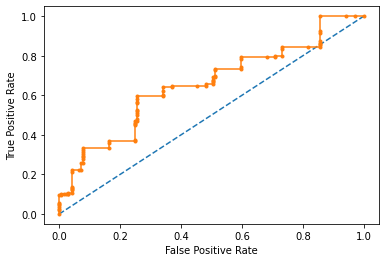

In [57]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [58]:
roc_auc = roc_auc_score(y_true=y_true, y_score=y_score, sample_weight=sample_weight)

In [59]:
print('AUC:', roc_auc) 

AUC: 0.6561975096376919


In [60]:
roc_auc_no_weight = roc_auc_score(y_true=y_true, y_score=y_score)

In [61]:
print('Unweighted AUC:', roc_auc_no_weight) 

Unweighted AUC: 0.5501234567901235
